## Практика

https://www.kaggle.com/c/shelter-animal-outcomes/

Дано: данные о кошках и собаках, поступивших в приют

Найти: что с ними станет? Возьмут в приют / вернётся хозяин / ...


In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
sample_submission = pd.read_csv('data/sample_submission.csv')

In [3]:
train.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [5]:
test.head()

,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White


In [6]:
sample_submission.head()

,ID,Adoption,Died,Euthanasia,Return_to_owner,Transfer
0,1,1,0,0,0,0
1,2,1,0,0,0,0
2,3,1,0,0,0,0
3,4,1,0,0,0,0
4,5,1,0,0,0,0


Приведем фичи датафреймов train и test к одному виду. Соединим их, при этом разделим флагом is_test

In [7]:
#удаляем лищние данные
X_train = train.drop(['AnimalID', 'OutcomeType', 'OutcomeSubtype'], axis=1)
X_test = test.drop(['ID'], axis=1)

#разделим флагом is_test
X_train['is_test'] = False
X_test['is_test'] = True

In [8]:
X_train.head()

,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,is_test
0,Hambone,2014-02-12 18:22:00,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,False
1,Emily,2013-10-13 12:44:00,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,False
2,Pearce,2015-01-31 12:28:00,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,False
3,NaN,2014-07-11 19:09:00,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,False
4,NaN,2013-11-15 12:52:00,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,False


In [9]:
X_test.head()

,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,is_test
0,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White,True
1,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan,True
2,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby,True
3,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor,True
4,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White,True


In [10]:
#соединим датафреймы
X = pd.concat([X_train, X_test], axis=0)

In [11]:
X.head()

,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,is_test
0,Hambone,2014-02-12 18:22:00,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,False
1,Emily,2013-10-13 12:44:00,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,False
2,Pearce,2015-01-31 12:28:00,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,False
3,NaN,2014-07-11 19:09:00,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,False
4,NaN,2013-11-15 12:52:00,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,False


In [12]:
X.columns = X.columns.str.lower()

In [13]:
X.head()

,name,datetime,animaltype,sexuponoutcome,ageuponoutcome,breed,color,is_test
0,Hambone,2014-02-12 18:22:00,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,False
1,Emily,2013-10-13 12:44:00,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,False
2,Pearce,2015-01-31 12:28:00,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,False
3,NaN,2014-07-11 19:09:00,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,False
4,NaN,2013-11-15 12:52:00,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,False


In [14]:
X.shape

(38185, 8)

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38185 entries, 0 to 11455
Data columns (total 8 columns):
name              27269 non-null object
datetime          38185 non-null object
animaltype        38185 non-null object
sexuponoutcome    38184 non-null object
ageuponoutcome    38161 non-null object
breed             38185 non-null object
color             38185 non-null object
is_test           38185 non-null bool
dtypes: bool(1), object(7)
memory usage: 2.4+ MB


Также нам необходимо закодировать значения целевой переменной

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(train.OutcomeType)

In [17]:
y

array([3, 2, 0, ..., 0, 4, 4])

### Получаем фичи

Добавление колонок произошедших от имени

In [18]:
#наличие имени 0 или 1
X['has_name'] = X.name.isnull().astype(int)
#длину имени
X['name_len'] = X.name.str.len()
X.name_len.fillna(X.name_len.median(), inplace=True)
#длину слов в имени
X['name_words_num'] = X.name.str.split().str.len()
X.name_words_num.fillna(X.name_words_num.median(), inplace=True)
#частоту имени
names_freq = X.name.value_counts().to_dict()
X['name_freq'] = X.name.apply(lambda x: names_freq.get(x))

In [19]:
names_freq

{'Bella': 195,
 'Max': 174,
 'Charlie': 163,
 'Daisy': 148,
 'Lucy': 128,
 'Princess': 128,
 'Rocky': 125,
 'Buddy': 111,
 'Luna': 108,
 'Jack': 96,
 'Lola': 88,
 'Coco': 88,
 'Sadie': 83,
 'Molly': 82,
 'Lucky': 78,
 'Blue': 77,
 'Shadow': 75,
 'Lily': 74,
 'Oreo': 74,
 'Toby': 71,
 'Maggie': 69,
 'Chico': 67,
 'Cookie': 65,
 'Duke': 65,
 'Milo': 63,
 'Sophie': 63,
 'Leo': 63,
 'Ginger': 63,
 'Lady': 61,
 'Marley': 60,
 'Pepper': 60,
 'Zeus': 60,
 'Sam': 59,
 'Rosie': 59,
 'Chloe': 58,
 'Oliver': 58,
 'Brownie': 57,
 'Sasha': 57,
 'Ruby': 57,
 'Diamond': 55,
 'Bear': 54,
 'Rex': 52,
 'Penny': 52,
 'Tiger': 51,
 'Riley': 51,
 'Buster': 51,
 'Peanut': 50,
 'Cooper': 50,
 'Gracie': 49,
 'Zoey': 49,
 'Stella': 49,
 'Jake': 48,
 'Sugar': 48,
 'Oso': 47,
 'Nala': 47,
 'Fiona': 47,
 'Abby': 47,
 'Jasper': 46,
 'Bailey': 46,
 'Jasmine': 45,
 'Minnie': 44,
 'Smokey': 44,
 'Jackson': 43,
 'Luke': 43,
 'Mia': 43,
 'Precious': 43,
 'Bonnie': 42,
 'Roxy': 42,
 'Harley': 41,
 'Beau': 41,
 'Bruno': 

Переводим строки в даты

/usr/lib/python3/dist-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


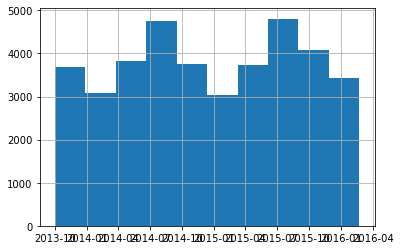

In [20]:
X.datetime = pd.to_datetime(X.datetime)
X.datetime.hist()

In [21]:
X['year'] = X.datetime.apply(lambda x: x.year)
X['month'] = X.datetime.apply(lambda x: x.month)
X['day'] = X.datetime.apply(lambda x: x.day)
X['hour'] = X.datetime.apply(lambda x: x.hour + x.minute/60)
X['weekday'] = X.datetime.apply(lambda x: x.weekday())

In [22]:
X.head()

,name,datetime,animaltype,sexuponoutcome,ageuponoutcome,breed,color,is_test,has_name,name_len,name_words_num,name_freq,year,month,day,hour,weekday
0,Hambone,2014-02-12 18:22:00,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,False,0,7.0,1.0,6.0,2014,2,12,18.366667,2
1,Emily,2013-10-13 12:44:00,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,False,0,5.0,1.0,25.0,2013,10,13,12.733333,6
2,Pearce,2015-01-31 12:28:00,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,False,0,6.0,1.0,2.0,2015,1,31,12.466667,5
3,NaN,2014-07-11 19:09:00,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,False,1,5.0,1.0,NaN,2014,7,11,19.150000,4
4,NaN,2013-11-15 12:52:00,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,False,1,5.0,1.0,NaN,2013,11,15,12.866667,4


Меняем тип животного на числовой

In [23]:
X.animaltype.value_counts()

Dog    22251
Cat    15934
Name: animaltype, dtype: int64

In [24]:
X['is_dog'] = (X.animaltype=='Dog').astype(int)

Меняем пол животного на числовой
* Neutered, Spayed - стерилизованные
* Intact - нетронутые

In [25]:
X.sexuponoutcome.value_counts()

Neutered Male    14014
Spayed Female    12633
Intact Female     5004
Intact Male       4985
Unknown           1548
Name: sexuponoutcome, dtype: int64

In [26]:
#заменим N/A на Unknown
X.sexuponoutcome.fillna('Unknown', inplace=True)

In [27]:
#создали новую колонку с информацией о стерилизации
X['sterilization'] = X.sexuponoutcome.apply(lambda x: x.split()[0])

In [28]:
X['sterilization'] 

0        Neutered
1          Spayed
2        Neutered
3          Intact
4        Neutered
           ...   
11451    Neutered
11452      Intact
11453      Intact
11454    Neutered
11455      Intact
Name: sterilization, Length: 38185, dtype: object

In [29]:
X.sterilization = X.sterilization.replace({'Neutered': 'Sterilized', 'Spayed': 'Sterilized'})

In [30]:
#индексируем колонку стерилизации
from sklearn import preprocessing
le_sterilization = preprocessing.LabelEncoder()
le_sex = preprocessing.LabelEncoder()
X.sterilization = le_sterilization.fit_transform(X.sterilization)
X.sterilization 

0        1
1        1
2        1
3        0
4        1
        ..
11451    1
11452    0
11453    0
11454    1
11455    0
Name: sterilization, Length: 38185, dtype: int64

In [31]:
#создаем колонку пол
X['sex'] = X.sexuponoutcome.apply(lambda x: x.split()[-1])

In [32]:
#индексируем пол
X.sex = le_sex.fit_transform(X.sex)

In [33]:
X.head()

,name,datetime,animaltype,sexuponoutcome,ageuponoutcome,breed,color,is_test,has_name,name_len,name_words_num,name_freq,year,month,day,hour,weekday,is_dog,sterilization,sex
0,Hambone,2014-02-12 18:22:00,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,False,0,7.0,1.0,6.0,2014,2,12,18.366667,2,1,1,1
1,Emily,2013-10-13 12:44:00,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,False,0,5.0,1.0,25.0,2013,10,13,12.733333,6,0,1,0
2,Pearce,2015-01-31 12:28:00,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,False,0,6.0,1.0,2.0,2015,1,31,12.466667,5,1,1,1
3,NaN,2014-07-11 19:09:00,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,False,1,5.0,1.0,NaN,2014,7,11,19.150000,4,0,0,1
4,NaN,2013-11-15 12:52:00,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,False,1,5.0,1.0,NaN,2013,11,15,12.866667,4,1,1,1


Преобразуем колонку ageuponoutcome

In [34]:
X.ageuponoutcome.str.split().str[1].value_counts()

years     15456
months    11995
year       5737
weeks      2404
month      1782
days        483
week        220
day          84
Name: ageuponoutcome, dtype: int64

In [35]:
X.ageuponoutcome.str.split().str[1].str.rstrip('s').value_counts()

year     21193
month    13777
week      2624
day        567
Name: ageuponoutcome, dtype: int64

In [36]:
t_digit = X.ageuponoutcome.str.split().str[0].fillna(0).astype(int)
t_digit

0        1
1        1
2        2
3        3
4        2
        ..
11451    2
11452    2
11453    1
11454    6
11455    4
Name: ageuponoutcome, Length: 38185, dtype: int64

In [37]:
t_int = X.ageuponoutcome.str.split().str[1].str.rstrip('s').replace({'year': 365, 'month': 365/12, 'week':7, 'day':1}).fillna(0)
t_int

0        365.000000
1        365.000000
2        365.000000
3          7.000000
4        365.000000
            ...    
11451     30.416667
11452      7.000000
11453    365.000000
11454    365.000000
11455    365.000000
Name: ageuponoutcome, Length: 38185, dtype: float64

In [39]:
X["years"] = t_digit*t_int/365

порода достаточно разнообразна и содержит в себе также некое поле "Mix" и краткошёрстность животного

In [40]:
X.breed.value_counts()[:10]

Domestic Shorthair Mix       12587
Pit Bull Mix                  2776
Chihuahua Shorthair Mix       2498
Labrador Retriever Mix        1949
Domestic Medium Hair Mix      1217
German Shepherd Mix            830
Domestic Longhair Mix          753
Siamese Mix                    562
Australian Cattle Dog Mix      513
Dachshund Mix                  437
Name: breed, dtype: int64

Cделаем просто: соединим все описания в один большой текст и посчитаем в нём вхождение каждого слова. Флаги наличия самых популярных и включим как фичи

In [41]:
from collections import Counter

one_big_text = " ".join(X.breed)
words = one_big_text.replace('/',' / ').split()
most_common = Counter(words).most_common()
most_common[:10]

[('Mix', 31871),
 ('Shorthair', 16290),
 ('Domestic', 14877),
 ('/', 4371),
 ('Chihuahua', 3690),
 ('Retriever', 3539),
 ('Bull', 3529),
 ('Pit', 3458),
 ('Labrador', 3280),
 ('Terrier', 2435)]

Выберем самые важные породы. Составим матрицу, состоящую только из вхождения первых N слов, обучим на них дерево и проверим важность фичей.

In [42]:
X_breed = pd.DataFrame()
for col, num in most_common[:10]:
    X_breed[col] = X[~X.is_test].breed.str.contains(col).astype(int)

In [43]:
X_breed.head()

,Mix,Shorthair,Domestic,/,Chihuahua,Retriever,Bull,Pit,Labrador,Terrier
0,1,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,1,0,0
3,1,1,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0


In [44]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_breed, train.OutcomeType)
clf.feature_importances_

array([0.03160924, 0.02125524, 0.82691139, 0.0446535 , 0.        ,
       0.        , 0.0701799 , 0.00539074, 0.        , 0.        ])

In [45]:
X_breed.columns

Index(['Mix', 'Shorthair', 'Domestic', '/', 'Chihuahua', 'Retriever', 'Bull',
       'Pit', 'Labrador', 'Terrier'],
      dtype='object')

В принципе, оказалось, что влияет по большей части только Domestic. Но включим сюда на всякий случай ещё один признак

In [46]:
X['is_domestic'] = X.breed.str.contains('Domestic').astype(int)
X['is_mix'] = X.breed.str.contains('Mix').astype(int)

Преобразуем колонку color

In [47]:
X.color.value_counts()[:10]

Black/White          4043
Black                3265
Brown Tabby          2359
Brown Tabby/White    1333
White                1333
Brown/White          1257
Orange Tabby         1187
Tan/White            1114
Tricolor             1067
Blue/White           1004
Name: color, dtype: int64

In [48]:
one_big_text = " ".join(X.color)
words = one_big_text.replace('/',' / ').split()
most_common = Counter(words).most_common()
most_common[:20]

[('/', 19862),
 ('White', 17362),
 ('Black', 11567),
 ('Brown', 9550),
 ('Tabby', 7405),
 ('Tan', 4374),
 ('Blue', 3391),
 ('Orange', 2015),
 ('Brindle', 1489),
 ('Red', 1397),
 ('Tricolor', 1285),
 ('Cream', 917),
 ('Tortie', 878),
 ('Point', 852),
 ('Calico', 802),
 ('Chocolate', 741),
 ('Torbie', 567),
 ('Gray', 554),
 ('Sable', 459),
 ('Merle', 458)]

In [49]:
X_color = pd.DataFrame()
for col, num in most_common[:10]:
    X_color[col] = X[~X.is_test].color.str.contains(col).astype(int)

In [50]:
clf.fit(X_color, train.OutcomeType)
clf.feature_importances_

array([0.13222148, 0.09588076, 0.0702783 , 0.06136179, 0.63291544,
       0.00164846, 0.        , 0.        , 0.00569378, 0.        ])

In [51]:
X_color.columns

Index(['/', 'White', 'Black', 'Brown', 'Tabby', 'Tan', 'Blue', 'Orange',
       'Brindle', 'Red'],
      dtype='object')

Здесь важность менее сосредоточена, возьмём первые 5 фичей. Самая важная, Tabby - это полосатость

In [52]:
X['is_color_tabby'] = X.color.str.contains('Tabby').astype(int)
X['is_color_mix'] = X.color.str.contains('/').astype(int)
X['is_color_white'] = X.color.str.contains('White').astype(int)
X['is_color_black'] = X.color.str.contains('Black').astype(int)
X['is_color_brown'] = X.color.str.contains('Brown').astype(int)

Осталось проверить итоговую таблицу на пропуски

In [53]:
X.isnull().sum()

name              10916
datetime              0
animaltype            0
sexuponoutcome        0
ageuponoutcome       24
breed                 0
color                 0
is_test               0
has_name              0
name_len              0
name_words_num        0
name_freq         10916
year                  0
month                 0
day                   0
hour                  0
weekday               0
is_dog                0
sterilization         0
sex                   0
years                 0
is_domestic           0
is_mix                0
is_color_tabby        0
is_color_mix          0
is_color_white        0
is_color_black        0
is_color_brown        0
dtype: int64

In [54]:
X.name_freq.fillna(X.name_freq.median(), inplace=True)

Разделим обратно на обучающую и тестовую выборки, дропнув при этом все лишние столбцы, которые были изначально

In [55]:
X[~X.is_test].head(1)

,name,datetime,animaltype,sexuponoutcome,ageuponoutcome,breed,color,is_test,has_name,name_len,...,sterilization,sex,years,is_domestic,is_mix,is_color_tabby,is_color_mix,is_color_white,is_color_black,is_color_brown
0,Hambone,2014-02-12 18:22:00,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,False,0,7.0,...,1,1,1.0,0,1,0,1,1,0,1


In [56]:
X_train.columns.str.lower()

Index(['name', 'datetime', 'animaltype', 'sexuponoutcome', 'ageuponoutcome',
       'breed', 'color', 'is_test'],
      dtype='object')

In [57]:
X_train_prep = X[~X.is_test].drop(X_train.columns.str.lower(), axis=1)
X_test_prep = X[X.is_test].drop(X_train.columns.str.lower(), axis=1)

In [58]:
X_train_prep.head()

,has_name,name_len,name_words_num,name_freq,year,month,day,hour,weekday,is_dog,sterilization,sex,years,is_domestic,is_mix,is_color_tabby,is_color_mix,is_color_white,is_color_black,is_color_brown
0,0,7.0,1.0,6.0,2014,2,12,18.366667,2,1,1,1,1.000000,0,1,0,1,1,0,1
1,0,5.0,1.0,25.0,2013,10,13,12.733333,6,0,1,0,1.000000,1,1,1,0,0,0,0
2,0,6.0,1.0,2.0,2015,1,31,12.466667,5,1,1,1,2.000000,0,1,0,1,1,0,0
3,1,5.0,1.0,9.0,2014,7,11,19.150000,4,0,0,1,0.057534,1,1,0,0,0,0,0
4,1,5.0,1.0,9.0,2013,11,15,12.866667,4,1,1,1,2.000000,0,0,0,0,0,0,0


### Работа с полученым фреймом

In [59]:
y = train['OutcomeType']
y

0        Return_to_owner
1             Euthanasia
2               Adoption
3               Transfer
4               Transfer
              ...       
26724           Transfer
26725           Transfer
26726           Adoption
26727           Transfer
26728           Transfer
Name: OutcomeType, Length: 26729, dtype: object

In [60]:
y.value_counts()

Adoption           10769
Transfer            9422
Return_to_owner     4786
Euthanasia          1555
Died                 197
Name: OutcomeType, dtype: int64

для учебных примеров оставим только 2 класса (Приютили, Умертвили), отличающихся значительно и по смыслу, и по размеру

In [61]:
is_first_2_class = (train['OutcomeType']=='Adoption')|(train['OutcomeType']=='Euthanasia')

In [62]:
train['OutcomeType'].head()

0    Return_to_owner
1         Euthanasia
2           Adoption
3           Transfer
4           Transfer
Name: OutcomeType, dtype: object

In [63]:
is_first_2_class

0        False
1         True
2         True
3        False
4        False
         ...  
26724    False
26725    False
26726     True
26727    False
26728    False
Name: OutcomeType, Length: 26729, dtype: bool

In [64]:
X_train_prep

,has_name,name_len,name_words_num,name_freq,year,month,day,hour,weekday,is_dog,sterilization,sex,years,is_domestic,is_mix,is_color_tabby,is_color_mix,is_color_white,is_color_black,is_color_brown
0,0,7.0,1.0,6.0,2014,2,12,18.366667,2,1,1,1,1.000000,0,1,0,1,1,0,1
1,0,5.0,1.0,25.0,2013,10,13,12.733333,6,0,1,0,1.000000,1,1,1,0,0,0,0
2,0,6.0,1.0,2.0,2015,1,31,12.466667,5,1,1,1,2.000000,0,1,0,1,1,0,0
3,1,5.0,1.0,9.0,2014,7,11,19.150000,4,0,0,1,0.057534,1,1,0,0,0,0,0
4,1,5.0,1.0,9.0,2013,11,15,12.866667,4,1,1,1,2.000000,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26724,1,5.0,1.0,9.0,2015,5,14,11.933333,3,0,0,1,0.083333,1,1,1,1,1,0,1
26725,1,5.0,1.0,9.0,2016,1,20,18.983333,2,0,1,0,0.250000,1,1,1,0,0,0,1
26726,0,4.0,1.0,60.0,2015,3,9,13.550000,0,1,1,1,4.000000,0,1,0,1,1,0,0
26727,1,5.0,1.0,9.0,2014,4,27,12.366667,6,0,0,1,0.076712,1,1,0,0,0,1,0


In [65]:
X_train_prep = X_train_prep[is_first_2_class]
#X_train_prep.index = range(len(X_train_prep))
y = y[is_first_2_class]
#y.index = range(len(y))

In [66]:
X_train_prep

,has_name,name_len,name_words_num,name_freq,year,month,day,hour,weekday,is_dog,sterilization,sex,years,is_domestic,is_mix,is_color_tabby,is_color_mix,is_color_white,is_color_black,is_color_brown
1,0,5.0,1.0,25.0,2013,10,13,12.733333,6,0,1,0,1.000000,1,1,1,0,0,0,0
2,0,6.0,1.0,2.0,2015,1,31,12.466667,5,1,1,1,2.000000,0,1,0,1,1,0,0
8,0,4.0,1.0,128.0,2014,2,4,17.283333,1,1,1,0,0.416667,0,1,0,1,1,0,0
9,1,5.0,1.0,9.0,2014,5,3,7.800000,5,1,1,0,1.000000,0,0,0,0,1,0,0
11,1,5.0,1.0,9.0,2013,11,4,14.800000,0,1,1,0,2.000000,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26718,1,5.0,1.0,9.0,2015,4,28,14.433333,1,1,1,1,0.166667,0,0,0,1,0,1,0
26720,0,7.0,1.0,57.0,2015,7,18,14.133333,5,0,1,0,0.166667,1,1,1,0,0,0,1
26721,0,10.0,2.0,1.0,2014,7,17,9.716667,3,0,1,0,5.000000,1,1,0,0,0,1,0
26723,0,4.0,1.0,60.0,2016,1,29,18.866667,4,1,1,1,6.000000,0,1,0,1,1,0,0


In [67]:
y

1        Euthanasia
2          Adoption
8          Adoption
9          Adoption
11         Adoption
            ...    
26718      Adoption
26720      Adoption
26721      Adoption
26723      Adoption
26726      Adoption
Name: OutcomeType, Length: 12324, dtype: object

In [68]:
#y теперь можно перевести в множество {0,1}
y = (y=='Adoption').astype(int)

In [482]:
X_train_prep.shape

(12324, 20)

In [483]:
y.shape

(12324,)

для оценки качества разобьём выборки на 2 части, 3:1

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_prep, y, test_size=0.25)

### Обучим классификатор

In [70]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [71]:
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

In [72]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [73]:
y_pred_proba 

array([[0.03048376, 0.96951624],
       [0.03048376, 0.96951624],
       [0.08805291, 0.91194709],
       ...,
       [0.0013031 , 0.9986969 ],
       [0.08805291, 0.91194709],
       [0.0013031 , 0.9986969 ]])

## ДЗ Реализовать самостоятельно вывод графика ROC-AUC

#### Посчитать tpr и fpr в ноутбуке с лекции. Убедиться, что график ROC AUC получается таким же, как и штатными средствами

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [81]:
#вероятности второго класса
y_pred_proba[:,1] > 0.7

array([ True,  True,  True, ...,  True,  True,  True])

In [84]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[ 261,  141],
       [  17, 2662]])

In [103]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred_proba[:,1] > 0.7)

array([[ 305,   97],
       [  85, 2594]])

In [142]:
((true_positive,false_positive),(false_negative,true_negative))=metrics.confusion_matrix(y_test, y_pred_proba[:,1] >0.7)
print(true_positive)
print(false_positive)
print(false_negative)
print(true_negative)

305
97
85
2594


In [138]:
def calculate_tpr_and_fpr(y_true, y_pred_probas, alpha):
    ## 1. Отнесите  наблюдения к одному  из нескольких классов в зависимости от порога
    ## 2. Посчитайте tpr и fpr
    ((true_positive,false_positive),(false_negative,true_negative))=metrics.confusion_matrix(y_true, y_pred_probas > alpha)
    
    tpr = true_positive/(true_positive+false_negative)
    fpr = false_positive/(false_positive+true_negative)
    #fpr = false_positive/(true_positive+true_negative)
    
    return tpr, fpr

In [135]:
calculate_tpr_and_fpr(y_test, y_pred_proba[:,1], 0.5)

(0.9388489208633094, 0.04823811152925077)

In [172]:
def roc_auc_plot(y_true, y_pred_probas):
    alphas = np.arange(0,1,0.001)
    tprs, fprs = [],[]
    for a in alphas:
        tpr, fpr = calculate_tpr_and_fpr(y_true, y_pred_probas, a)
        tprs.append(tpr)
        fprs.append(fpr)
        
    plt.plot(fprs, tprs)
    plt.show()

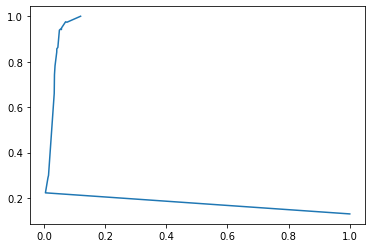

In [176]:
roc_auc_plot(y_test, y_pred_proba[:,1])

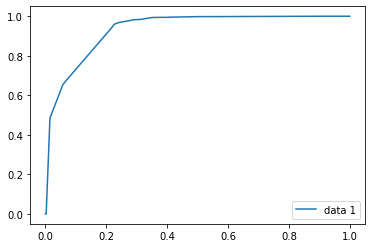

In [175]:
## SKLEARN
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba[:,1])
plt.plot(fpr,tpr,label="data 1")
plt.legend(loc=4)
plt.show()